In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))


# Summarize the model
model.summary()

C:\Users\myson\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [10]:

from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = 'training.csv'
train_data = pd.read_csv(Train_Dir)  
train_data.fillna(method = 'ffill',inplace = True)
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')



In [11]:
X_train=np.expand_dims(X_train,axis=4)
print(X_train.shape)

(7049, 96, 96, 1)


C:\Users\myson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


In [12]:

hist = History()
epochs = 50
batch_size = 64

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(X_train, y_train, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)


model.save('my_model2.h5')

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 78s 14ms/step - loss: 245.8790 - acc: 0.3040 - val_loss: 90.3874 - val_acc: 0.6674

Epoch 00001: val_loss improved from inf to 90.38742, saving model to weights.final_2.hdf5
Epoch 2/50
5639/5639 [==============================] - 81s 14ms/step - loss: 124.7445 - acc: 0.3435 - val_loss: 75.9740 - val_acc: 0.6830

Epoch 00002: val_loss improved from 90.38742 to 75.97398, saving model to weights.final_2.hdf5
Epoch 3/50
5639/5639 [==============================] - 79s 14ms/step - loss: 91.2895 - acc: 0.3907 - val_loss: 78.6404 - val_acc: 0.6752

Epoch 00003: val_loss did not improve from 75.97398
Epoch 4/50
5639/5639 [==============================] - 72s 13ms/step - loss: 74.5277 - acc: 0.4247 - val_loss: 52.6601 - val_acc: 0.6787

Epoch 00004: val_loss improved from 75.97398 to 52.66014, saving model to weights.final_2.hdf5
Epoch 5/50
5639/5639 [==============================] - 79s 14

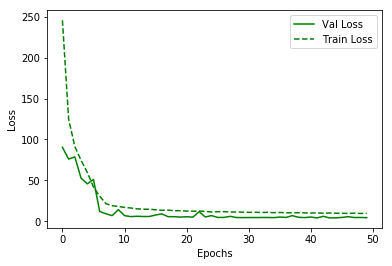

In [13]:
# Visualize the training and validation loss of the neural network
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\myson\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()


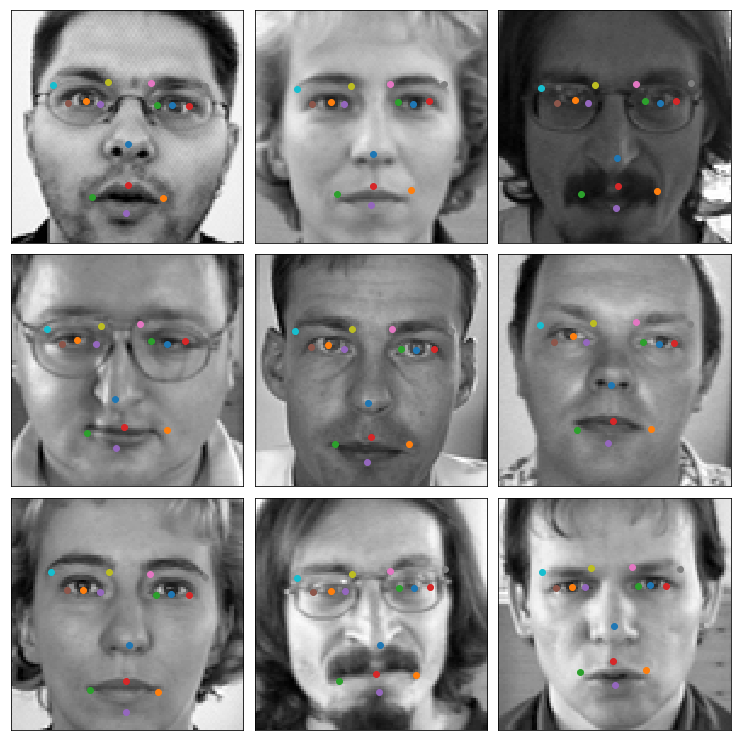

In [20]:
#preparing test data
test_data = pd.read_csv('test.csv')
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)
timage_list = np.array(timag,dtype = 'float')
X_test1 = timage_list.reshape(-1,96,96)
X_test=np.expand_dims(X_test1,axis=4)

y_test = model.predict(X_test)
fig = plt.figure(figsize=(10,10))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10,19):
    ax = fig.add_subplot(3, 3, i -9, xticks=[], yticks=[])
    ax.imshow(X_test1[i],cmap='gray')
    for p in range(0, 30,2):
        ax.scatter( y_test[i][p],y_test[i][p+1],marker='o')
